# GRIP : The Sparks Foundation


## Auther : Ajay Singh Shekhawat
## Data Science And Business Analytics Intern
# Task 1 : Exploratory Data Analysis - Retail

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the requred libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
retail = pd.read_csv("C:\\Users\\Sanjay\\Downloads\\SampleSuperstore.csv")
retail.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# checking the shape

retail.shape

(9994, 13)

In [5]:
#checking the info of columns
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


- as we can clearly see that no any null values present in any of columns.
- and all the datatypes of all the columns are correct.

In [6]:
retail.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


- we use describe to check mathematical properties of the data sets.

In [7]:
(retail.isnull().sum())

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

- as we can see no any null values present in any of the columns

In [8]:
for i in retail:
    print(retail[i].value_counts(ascending = False))
    print('\n==============================================================\n')

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64


Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64


United States    9994
Name: Country, dtype: int64


New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Manhattan            1
Rochester Hills      1
Springdale           1
San Mateo            1
Ontario              1
Name: City, Length: 531, dtype: int64


California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indian

## checking for duplicate values

In [9]:
retail.duplicated().sum()

17

In [10]:
#dropping the rows having duplicates value
retail.drop_duplicates(inplace = True)
retail.shape

(9977, 13)

In [11]:
retail.duplicated().sum()

0

## Step 2: Cleaning and Visualising of the Data

## uni-variate analysis: 

## >>> checking for outliers of continous variables :

AxesSubplot(0.125,0.125;0.775x0.755) Text(0.5, 1.0, 'Sales')


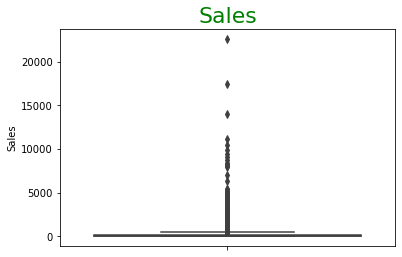

AxesSubplot(0.125,0.125;0.775x0.755) Text(0.5, 1.0, 'Quantity')


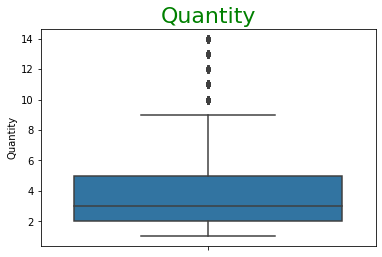

AxesSubplot(0.125,0.125;0.775x0.755) Text(0.5, 1.0, 'Discount')


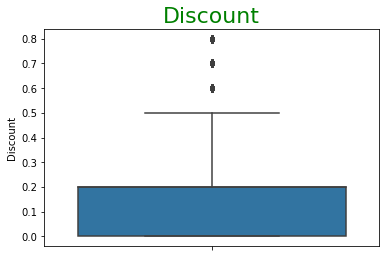

AxesSubplot(0.125,0.125;0.775x0.755) Text(0.5, 1.0, 'Profit')


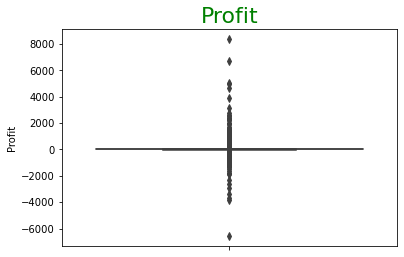

In [12]:
cols= ['Sales','Quantity','Discount','Profit']
for col in cols:
    print(sns.boxplot(y = retail[col]),plt.title(col ,color = 'green' ,fontsize = 22))
    plt.show()
    print('==================================================================================')

## Inferences:
- `Discount` =>>>
     * some outliers are present but there is no any extream outliers are there.
- `Quantity` =>>>
     * in this variable also no any extream outliers are present.
- `Sales`  =>>>>
     * some extream  outliers are present but it sales so thats ok but we will check further about this.
- `Profit` ==>>>>
     * in this we can see that we have some outliers in positive profit and also some negative profit that means loss.
     * we can add new target column where pofit is > 0 then yes or no. so that we can identify some factors.

### Removing Postal Code column we don't need it in our analysis:

In [13]:
retail = retail.drop('Postal Code' , axis = 1)

#  binning of continous variables:

###  binning  Sales column to categorical for analysis:

In [14]:
#Creating A new categorical variable based on Sales 
retail['Sales group'] = pd.qcut(retail.Sales,
                               q = [0,0.1,0.3,0.6,0.8,1],
                               labels = ['very low','low','medium','high','very high'])

In [15]:
#Creating A new categorical variable based on Discount 
retail['Discount group'] = pd.qcut(retail.Discount.rank(method='first'),
                               q = [0,0.1,0.3,0.6,0.8,1],
                               labels = ['very low','low','medium','high','very high'])

### Adding new Target column where 1 if profit is positive and 0 if negative 

In [16]:
retail['Target'] = np.where( retail['Profit'] > 0 , 1 , 0)

In [17]:
retail.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Sales group,Discount group,Target
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,high,very low,1
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,very high,very low,1
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,low,very low,1
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,very high,very high,0
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,medium,medium,1


In [18]:
Target = retail.Target.value_counts(normalize = True)*100
Target

1    80.615415
0    19.384585
Name: Target, dtype: float64

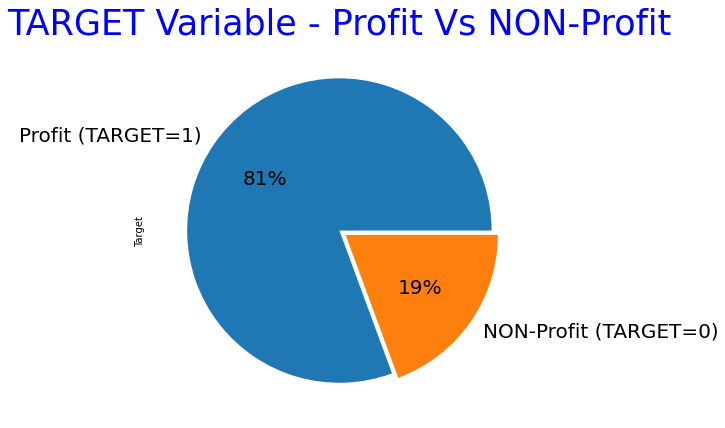

In [19]:
#checking Profit vs non Profit Proportion
plt.figure(figsize = [9,7])
Target.plot.pie(labels=['Profit (TARGET=1)','NON-Profit (TARGET=0)'],
                explode=(0,0.05),autopct='%1.f%%',fontsize = 20)

plt.title('TARGET Variable - Profit Vs NON-Profit', color = 'blue', fontsize = 35)
plt.show()

# Inferences:

- As we can see that our 81% of data is frofitable and 19% is non-profitable.

### >>> checking distribution of continuous variables:

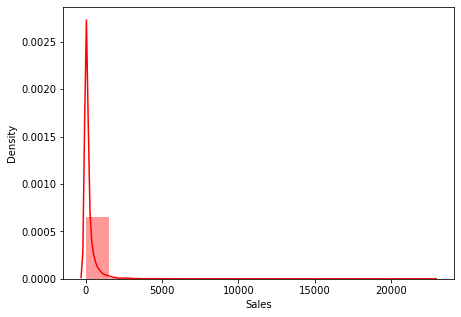

In [20]:
#plot the distplot of salary variable.
plt.figure(figsize = [7,5])
sns.distplot(retail.Sales,color="red", bins = 15)
plt.show()

## Inferences:
- as we can see that highest density of sales lies in around `0 to 2000` range.

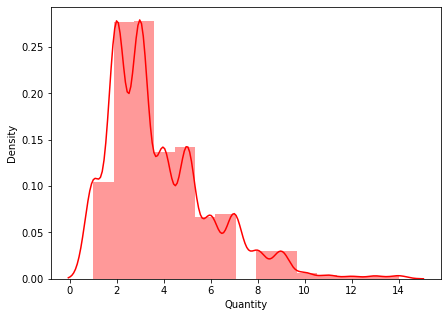

In [21]:
#plot the distplot of Quantity variable.
plt.figure(figsize = [7,5])
sns.distplot(retail.Quantity,color="red", bins = 15)
plt.show()

## Inferences:
- Density of Quantity range `2 to 4` is very high with compare to other quantity.

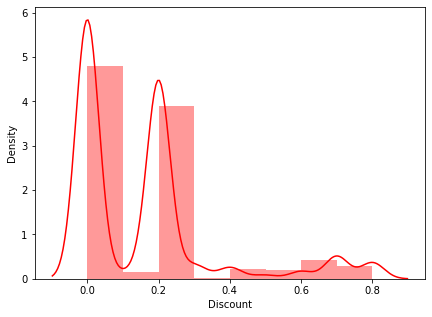

In [22]:
#plot the distplot of Discount variable.
plt.figure(figsize = [7,5])
sns.distplot(retail.Discount,color="red", bins = 8)
plt.show()

## Inferences:
- Density of discount range `0.0 to 0.1` is highest with compare to other quantity.
- Density of discount range `0.2 to 0.3` is second highest with compare to other quantity.

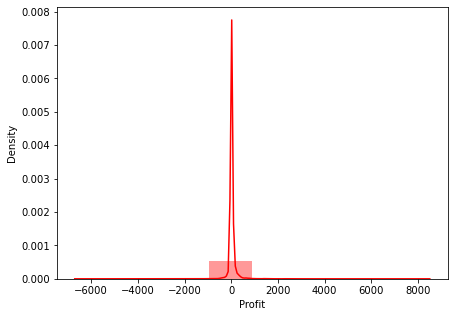

In [23]:
#plot the distplot of profit variable.
plt.figure(figsize = [7,5])
sns.distplot(retail.Profit,color="red", bins = 8)
plt.show()

- here its evident that we have highest density of the profit around 0 to +- 800.

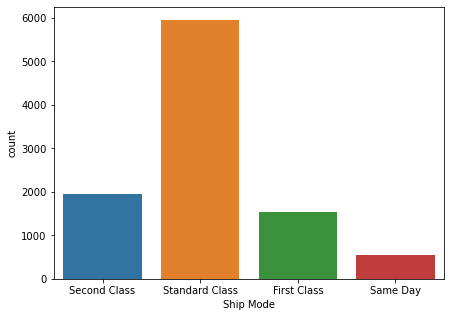

In [24]:
#plot the histogram of profit variable.
plt.figure(figsize = [7,5])
sns.countplot(retail['Ship Mode'])
plt.show()

- we can see that we are having highest weighage of standard class delivery method.

## Bi-variate analysis: 


### Plotting pairplot of all continuous variables

<Figure size 504x360 with 0 Axes>

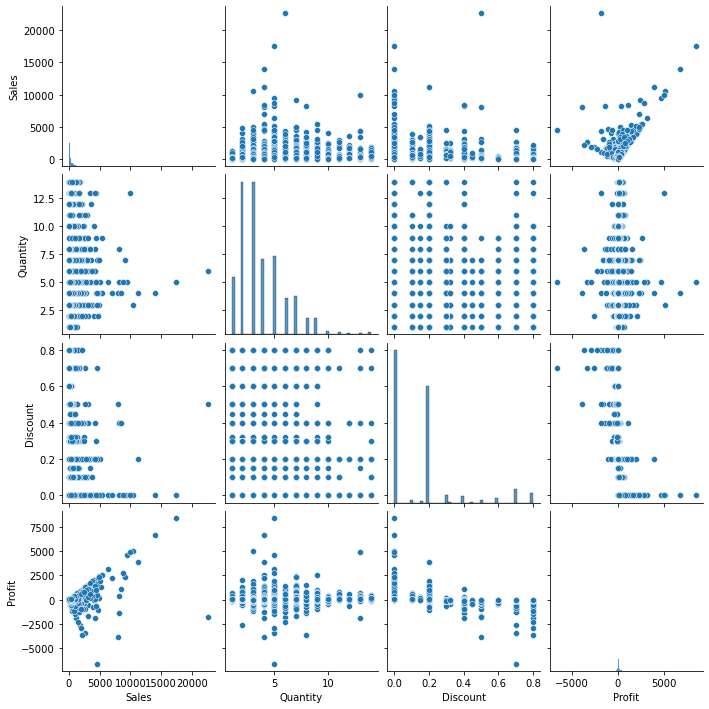

In [25]:
# Bivariate Analysis For Continuous vs Continuous Variables :
plt.figure(figsize = [7,5])
sns.pairplot(retail.iloc[:,:-1])
plt.show()

### Plotting co-relation heatmap of all continuous variables

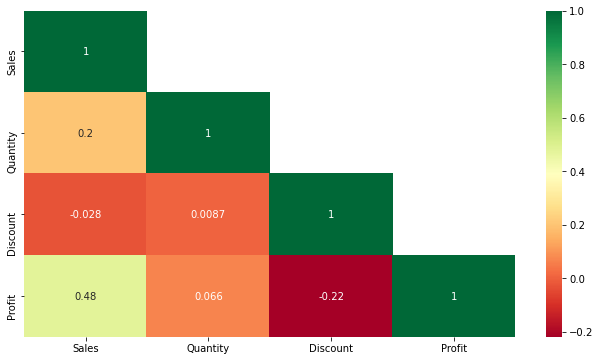

In [26]:
# checking co-relation For Continuous vs Continuous Variables :
mask = np.array(retail.iloc[:,8:-1].corr())
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize = [11,6])
sns.heatmap(retail.iloc[:,8:-1].corr(),annot = True, cmap='RdYlGn',mask = mask)
plt.show()

## Inferences:
- Here it's evident that discount with target is negatively co-related that means if discount will increase the profit will dicrease.
- Sales is positively co-related with profit.

## multy-variate analysis: 


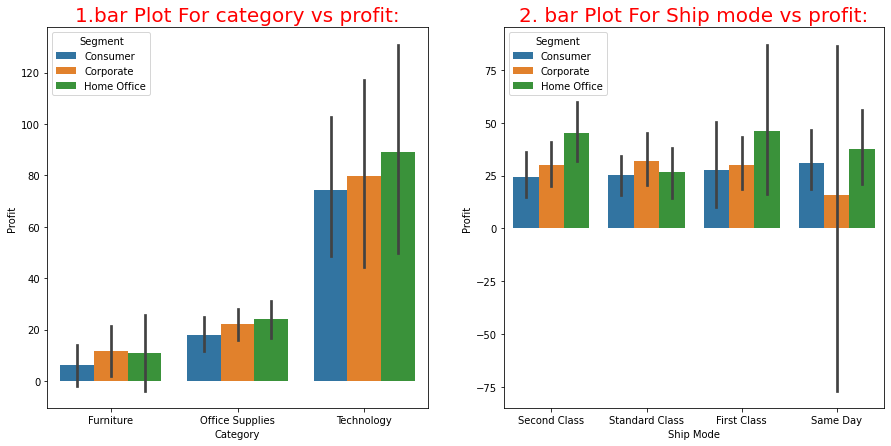

In [27]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.barplot(x = 'Category', y = 'Profit',hue = 'Segment',data = retail )
plt.title('1.bar Plot For category vs profit:',color="red", fontsize = 20)
plt.ylabel('Profit')
plt.subplot(1,2,2)
sns.barplot(x = 'Ship Mode' , y = 'Profit',hue = 'Segment',data = retail )
plt.title('2. bar Plot For Ship mode vs profit:',color="r", fontsize = 20)
plt.ylabel('Profit')

plt.show()

## Inferences:
- In plot one we can clearly see that Categry technology is highly profitable & in technology home office segment highly profitable.
- In plot two we can clearly see that shipmode second class and first class is highly profitable are very similar to each other.

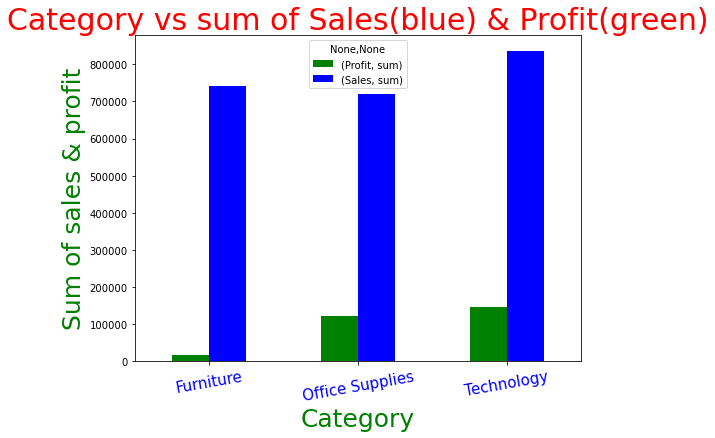

In [28]:
#plotting bar plot for category vs sales_total and profit_total
retail.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar(color= 'gb',figsize = [8,6])
plt.xticks(ticks= [0,1,2] ,label = ['Furniture','Office Supplies','Technology'], color = 'b' ,fontsize = 15 , rotation = 10)
plt.xlabel('Category', color = 'g', size = 25)
plt.ylabel('Sum of sales & profit', color = 'g', size = 25)
plt.title('Category vs sum of Sales(blue) & Profit(green)', color = 'red', fontsize = 30)
plt.show()

## Inferences:
- It depicts that in technology category the sale is high and also the profit is also higher.
- In furniture category the profit is very less with compare to sales.

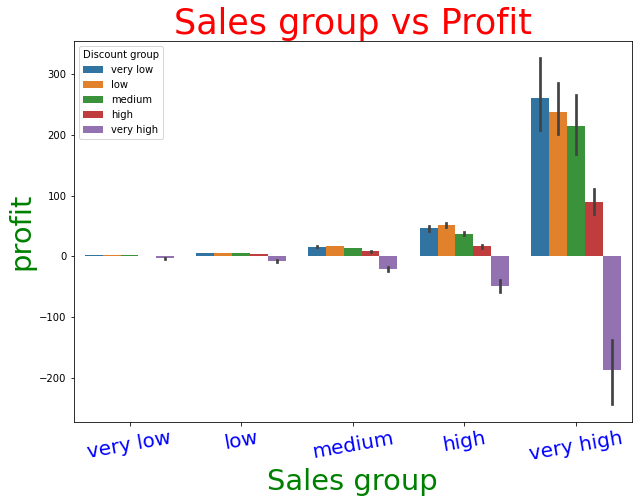

In [29]:
#plotting bar plot for category vs sales_total and profit_total
plt.figure(figsize= (10,7))
sns.barplot(x= 'Sales group',y='Profit',hue = 'Discount group',data = retail)
plt.xticks(ticks= [0,1,2,3,4,] ,label = ['very low','low','medium','high','very high'], color = 'b' ,fontsize = 20 , rotation = 10)
plt.xlabel('Sales group', color = 'g', size = 29)
plt.ylabel('profit', color = 'g', size = 29)
plt.title('Sales group vs Profit', color = 'red', fontsize = 35)
plt.show()

- ## Inferences:
- It depicts that in very high sales group the profit is high in all discount group except very high discount group.
- In very high sales group  it evident that in very high discount group we are getting very high losses.

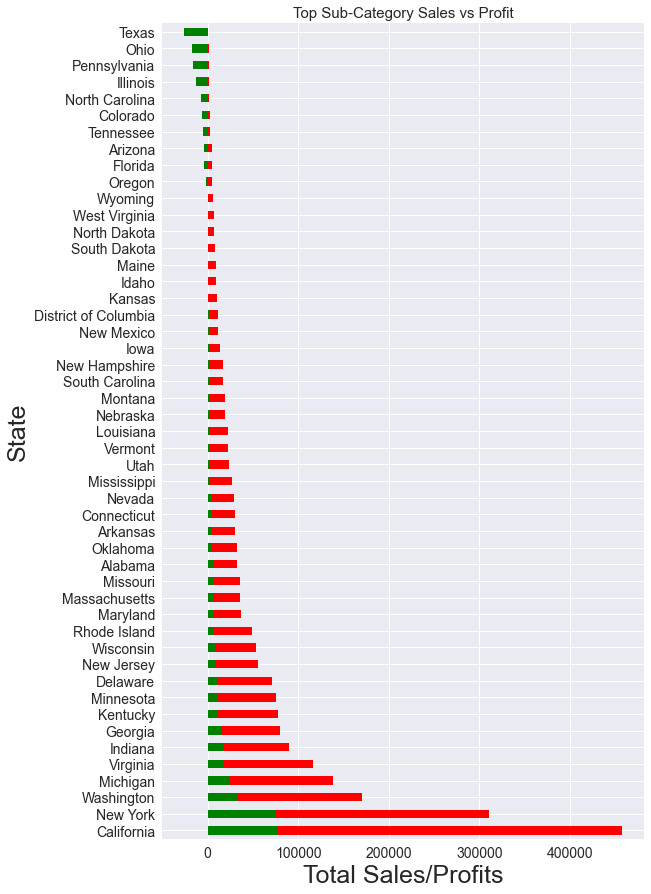

In [61]:
# computing top states in terms of sales from first 100 observations
top_state_s = retail.groupby("State").Sales.sum().nlargest(100)
# computing top states in terms of profit from first 100 observations
top_state_p = retail.groupby("State").Profit.sum().nlargest(100)

# plotting to see it visually
plt.subplot(1,2,1)
plt.style.use('seaborn')
top_state_s.plot(kind = 'barh',figsize = (19,15),fontsize = 14,color='r')
top_state_p.plot(kind = 'barh',figsize = (19,15),fontsize = 14, color = 'g')
plt.ylabel('State',fontsize = 25)
plt.xlabel('Total Sales/Profits',fontsize = 25)
plt.title("Top Sub-Category Sales vs Profit",fontsize = 15)
plt.show()




- ## Inferences:
- It depicts that in california,newyork and washington States we are getting highest profit with highest sales.
- And texas,ohio and pennsylvania here we are getting losses so we can reduce our sales in thease states.

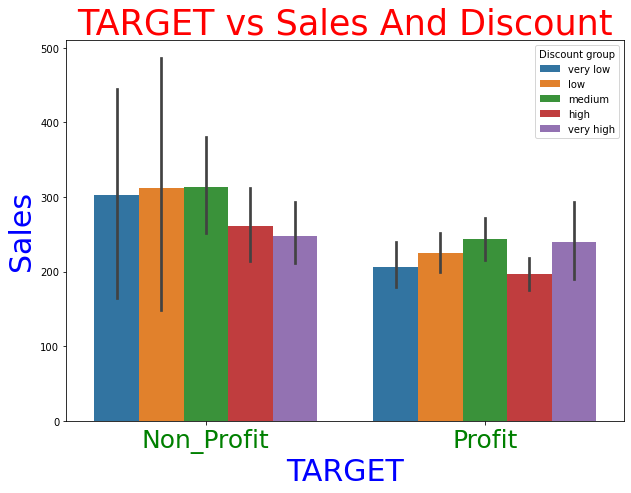

In [30]:
# bar plot for sales vs  discount group in both profitable and non-profitable data.
plt.figure(figsize= (10,7))
sns.barplot(x= 'Target',y='Sales',hue = 'Discount group',data = retail)
plt.xticks(ticks = [0,1],labels=  ['Non_Profit','Profit'], rotation = 0, fontsize= 25 , color = 'g')
plt.title('TARGET vs Sales And Discount', fontsize = 35, color = 'r')
plt.xlabel('TARGET', fontsize= 30, color = 'b')
plt.ylabel('Sales', fontsize =30, color = 'b')

plt.show()

## Inferences:
- It depicts thatin non-profitable data sales is higher in low and medium discount group.
- And in profitable data the sales is highest in medium and very high discount group.

>>> ## here we can say that except very high discount group we are getting high sales in non- profitable data set with comapared to profitable data set.

## Splitting the dataframe into two separate dfs with the help of Target:

In [31]:
retail_f = retail[(retail.Target == 1) ] # dataframe containing information of all defaulters.
retail_f.shape

(8043, 15)

In [32]:
retail_nf = retail[(retail.Target== 0) ] # dataframe containing information of all non-defaulters.
retail_nf.shape

(1934, 15)

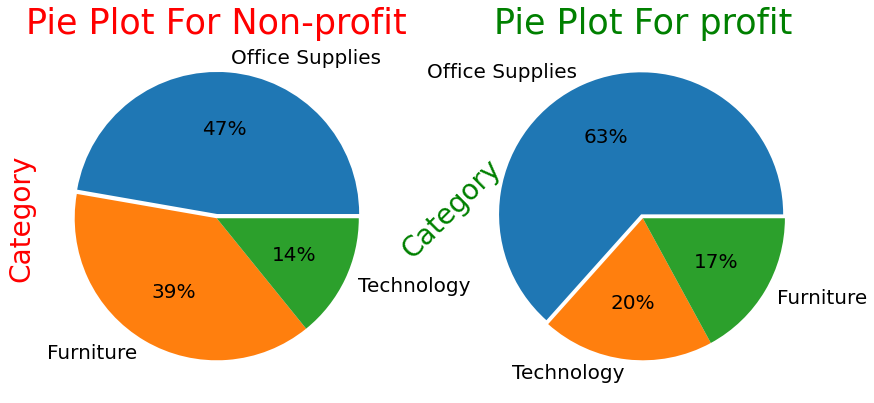

In [33]:
# plotting the pie plot for category variabe and we will compare it with profitable and non-profitable data set.
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)

t1= retail_nf.Category.value_counts(normalize = True)*100
t1.plot.pie(autopct='%1.f%%',fontsize = 20,explode = (0.03, 0,0))
plt.title('Pie Plot For Non-profit',color="r", fontsize = 35)
plt.ylabel('Category', fontsize=28 , color = 'r')

plt.subplot(1,2,2)
t2= retail_f.Category.value_counts(normalize = True)*100
t2.plot.pie(autopct='%1.f%%',fontsize = 20,explode = (0.03, 0,0))
plt.title('Pie Plot For profit',color="g", fontsize = 35)
plt.ylabel('Category', fontsize=28 , color = 'g',rotation = 45)
plt.show()


## Inferences:
- It evident that in Profitable data set we are getting high weightage in office supply category.
- But  Contrary to that in non-profitable data set office supplies is also having high weightage.
- And in non-profitable we are getting high weightage in furniture category then profitable data.

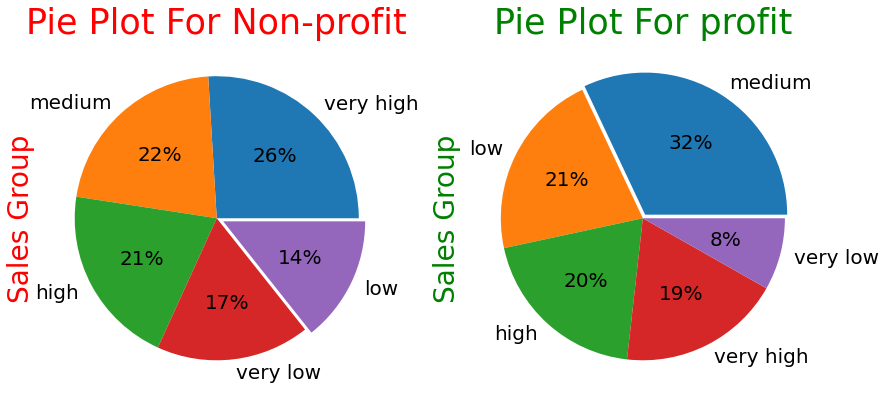

In [34]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)

t1= retail_nf['Sales group'].value_counts(normalize = True)*100
t1.plot.pie(autopct='%1.f%%',fontsize = 20,explode = (0, 0, 0, 0,0.05))
plt.title('Pie Plot For Non-profit',color="r", fontsize = 35)
plt.ylabel('Sales Group', fontsize=28,color = 'r')

plt.subplot(1,2,2)
t2= retail_f['Sales group'].value_counts(normalize = True)*100
t2.plot.pie(autopct='%1.f%%',fontsize = 20,explode = (0.03, 0, 0, 0,0))
plt.title('Pie Plot For profit',color="g", fontsize = 35)
plt.ylabel('Sales Group', fontsize=28 , color = 'g')
plt.show()

## Inferences:
- In profitable data set we are getting high weightage in medium sales group with compared to non-profitable.
- And in high sales group its almost similar weightage is visible in both the data set.
- In very low sales group there are very high weightage in non-profit data set with compared to profitable data set.

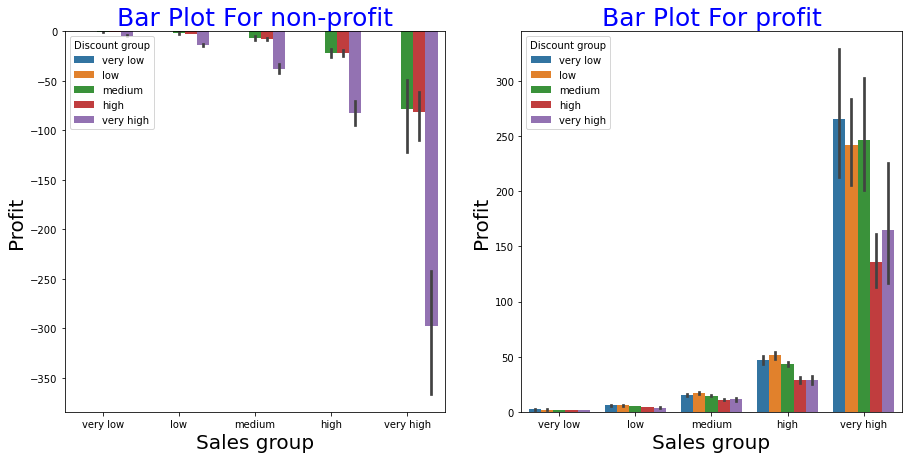

In [35]:
# checking with salary group category and DAYS_BIRTH(age of clint) with hue = CODE_GENDER in our both defaulting and non-defaulting data.
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.barplot(x = 'Sales group', y = 'Profit',hue = 'Discount group',data = retail_nf )
plt.title('Bar Plot For non-profit',color="blue", fontsize = 25)
plt.ylabel('Profit',fontsize = 20)
plt.xlabel('Sales group',fontsize = 20)

plt.subplot(1,2,2)
sns.barplot(x = 'Sales group', y = 'Profit',hue = 'Discount group',data = retail_f )
plt.title('Bar Plot For profit',color="blue", fontsize = 25)
plt.ylabel('Profit',fontsize = 20)
plt.xlabel('Sales group',fontsize = 20)
plt.show()

## Inferences:
- From left plot we can clearly see that in very high sales group very high discount is creating more losses. 
- And from right plot very low discount group having more profits.
- over all very high sales is performing well with some anomaly but very low and low discount is performing very well without any loss.

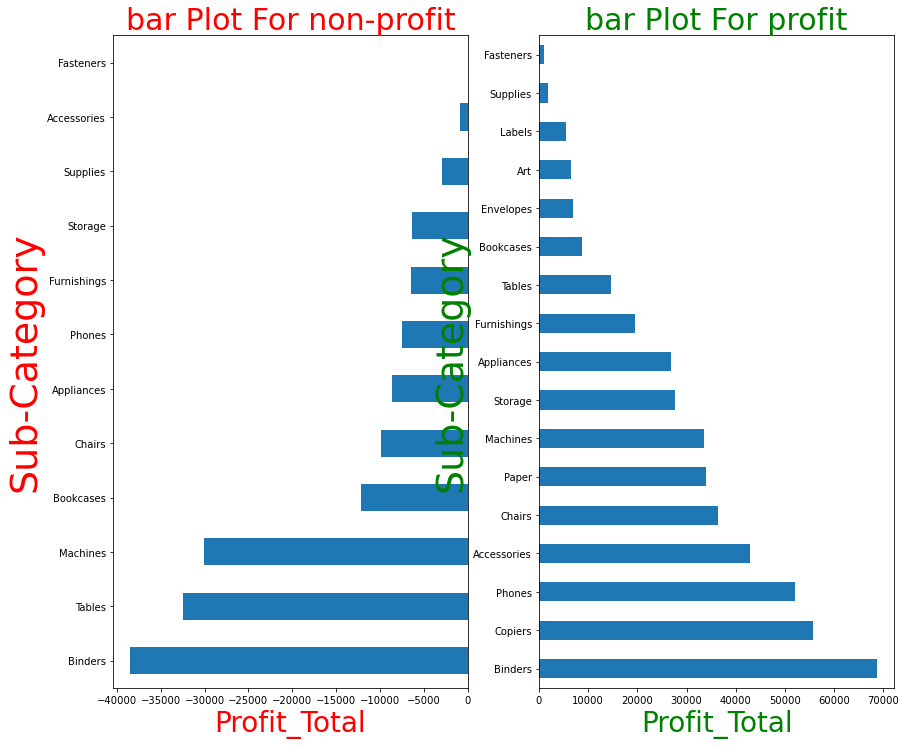

In [36]:
plt.figure(figsize=(14,12))

plt.subplot(1,2,1)
statewise = retail_nf.groupby(['Sub-Category'])['Profit'].sum().nsmallest(50)
statewise.plot.barh() # h for horizontal
plt.title('bar Plot For non-profit',color="r", fontsize = 30)
plt.ylabel('Sub-Category',fontsize = 38, color= 'r')
plt.xlabel('Profit_Total',fontsize = 28, color= 'r')

plt.subplot(1,2,2)
subcatwise = retail_f.groupby(['Sub-Category'])['Profit'].sum().nlargest(50)
subcatwise.plot.barh()
plt.title('bar Plot For profit',color="g", fontsize = 30)
plt.ylabel('Sub-Category',fontsize = 38, color= 'g')
plt.xlabel('Profit_Total',fontsize = 28, color= 'g')
plt.show()

## Inferences:
- It depicts that in tables, machines and bookcases sub-category we are getting more losses but less profit.
- We can see that in blinders category we are getting high profit but in Contrary to that we are getting high losses in the same also.
- We have to increse the sales of copiers,phones,accessories,paper and envelop because we are getting high profit  but negligible losses.

# Final Conclusion:

  - We have to focus on california,newyork and washington States as we are getting highest profit with highest sales.
  - In tables, machines and bookcases sub-category we are getting more losses but less profit so we have to minimize it.
  - We have to increase the sales of copiers,phones,accessories,paper and envelop because we are getting high profit but negligible losses.
  - We have to stop giving very high discount because its creating more losses.
  - We have to increase sales because at low and very low sales we are getting more losses.
  - We have to minimize the sales of furnitures because we are getting more losses then profit.
  - Technology category is highly profitable & in technology home office segment is highly profitable.